In [33]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt

In [2]:
PGJ_input=pd.read_csv("Carpetas de Investigación PGJ CDMX.csv",sep=";")
PGJ_input.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [3]:
Alcaldias_input=pd.read_csv("Alcaldías.csv",sep=";")
Alcaldias_input

,NOMBRE,CLAVE_MUNICIPAL,CVE_ENTIDAD,CVEGEO,Geo Point,Geo Shape
0,Tlalpan,12,9,9012,"19.1983396763, -99.2062207957","{""type"": ""Polygon"", ""coordinates"": [[[-99.1962..."
1,Tláhuac,11,9,9011,"19.2769983772, -99.0028216137","{""type"": ""Polygon"", ""coordinates"": [[[-98.9789..."
2,Venustiano Carranza,17,9,9017,"19.4304954545, -99.0931057959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1089..."
3,Cuauhtémoc,15,9,9015,"19.4313734294, -99.1490557562","{""type"": ""Polygon"", ""coordinates"": [[[-99.1291..."
4,Iztapalapa,7,9,9007,"19.3491663204, -99.0567989642","{""type"": ""Polygon"", ""coordinates"": [[[-99.0581..."
5,Azcapotzalco,2,9,9002,"19.4853286147, -99.1821069423","{""type"": ""Polygon"", ""coordinates"": [[[-99.1823..."
6,Benito Juárez,14,9,9014,"19.3806424162, -99.1611346584","{""type"": ""Polygon"", ""coordinates"": [[[-99.1367..."
7,Cuajimalpa de Morelos,4,9,9004,"19.3246343001, -99.3107285253","{""type"": ""Polygon"", ""coordinates"": [[[-99.2569..."
8,Iztacalco,6,9,9006,"19.396911897, -99.094329797","{""type"": ""Polygon"", ""coordinates"": [[[-99.0558..."
9,Gustavo A. Madero,5,9,9005,"19.5040652077, -99.1158642087","{""type"": ""Polygon"", ""coordinates"": [[[-99.1185..."


In [4]:
PGJ_input["categoria_delito"].unique()

array(['DELITO DE BAJO IMPACTO',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'ROBO A NEGOCIO CON VIOLENCIA', 'HECHO NO DELICTIVO',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
       'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'HOMICIDIO DOLOSO',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'VIOLACIÓN',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA', 'SECUESTRO'],
      dtype=object)

In [5]:
alcaldias=Alcaldias_input["NOMBRE"]
alcaldias=alcaldias.str.replace("Á","A")
alcaldias=alcaldias.str.replace("á","a")
alcaldias=alcaldias.str.replace("É","E")
alcaldias=alcaldias.str.replace("é","e")
alcaldias=alcaldias.str.replace("Í","I")
alcaldias=alcaldias.str.replace("í","i")
alcaldias=alcaldias.str.replace("Ó","O")
alcaldias=alcaldias.str.replace("ó","o")
alcaldias=alcaldias.str.replace("Ú","u")
alcaldias=alcaldias.str.replace("ú","u")
alcaldias = [alcaldia.upper() for alcaldia in alcaldias]
alcaldias

['TLALPAN',
 'TLAHUAC',
 'VENUSTIANO CARRANZA',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'CUAJIMALPA DE MORELOS',
 'IZTACALCO',
 'GUSTAVO A. MADERO',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'COYOACAN',
 'MILPA ALTA',
 'ALVARO OBREGON',
 'XOCHIMILCO']

In [6]:
PGJ_alcaldias=PGJ_input.loc[PGJ_input["alcaldia_hechos"].isin(alcaldias),:]
PGJ_alcaldias

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"
5,2017.0,Junio,2017-06-16 02:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-1CD,ISIDRO FABELA,TLALPAN,2017-06-19 14:12:37,Junio,2017,ANILLO PERIF. BOULEVARD ADOLFO RUIZ CORTINEZ,NaN,-99.176686,19.303028,"19.3030281171, -99.1766860005"
6,2017.0,Junio,2017-06-19 13:22:00,"NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COME...",DELITO DE BAJO IMPACTO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE N...,ACD,UI-1CD,MOCTEZUMA 2A SECCIÓN,VENUSTIANO CARRANZA,2017-06-19 14:13:11,Junio,2017,ORIENTE 144,NaN,-99.104402,19.430180,"19.4301803453, -99.1044015884"
7,2017.0,Junio,2017-06-17 15:15:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMH,UI-1CD,GUERRERO,CUAUHTEMOC,2017-06-19 14:14:36,Junio,2017,ESTACION DEL METRO HIDALGO,AL ABORDAR VAGON DEL METRO,-99.146097,19.437645,"19.4376450034, -99.146096728"
9,2017.0,Junio,2017-06-18 11:00:00,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-1SD,JUAN ESCUTIA,IZTAPALAPA,2017-06-19 14:17:54,Junio,2017,JOAQUIN GUTIERREZ,NaN,-99.048867,19.395322,"19.3953224177, -99.0488673055"
11,2017.0,Junio,2017-06-18 12:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-1CD,SAN MIGUEL TOPILEJO,TLALPAN,2017-06-19 14:21:52,Junio,2017,AV. SANTA CRUZ,NaN,-99.144865,19.192782,"19.1927817001, -99.1448647132"


In [7]:
Primer_año=2016
Ultimo_año=2019

In [8]:
PGJ_base=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]>Primer_año-1,:]
PGJ_base=PGJ_base.loc[PGJ_base["año_hechos"]<Ultimo_año+1,:]
PGJ_base.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [9]:
PGJ_Tipo_Delito=PGJ_base.groupby(["año_hechos","categoria_delito","alcaldia_hechos"]).count()
PGJ_Tipo_Delito=PGJ_Tipo_Delito["delito"]
PGJ_Tipo_Delito.head(10)

año_hechos  categoria_delito        alcaldia_hechos       
2016.0      DELITO DE BAJO IMPACTO  ALVARO OBREGON             9773
                                    AZCAPOTZALCO               7976
                                    BENITO JUAREZ             13662
                                    COYOACAN                  10913
                                    CUAJIMALPA DE MORELOS      2498
                                    CUAUHTEMOC                25067
                                    IZTACALCO                  6084
                                    IZTAPALAPA                21382
                                    LA MAGDALENA CONTRERAS     2497
                                    MIGUEL HIDALGO            10226
Name: delito, dtype: int64

In [10]:
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_Top_2018=PGJ_2018.groupby(["delito"],as_index=False).count()
PGJ_Top_2018=(PGJ_Top_2018.sort_values(by ="año_hechos",ascending=False)).head(30)
PGJ_Top_2018=PGJ_Top_2018["delito"]
PGJ_Top_2018

245                                   VIOLENCIA FAMILIAR
137                         ROBO A NEGOCIO SIN VIOLENCIA
200                                      ROBO DE OBJETOS
173           ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA
59                                                FRAUDE
38                                    DENUNCIA DE HECHOS
7                                               AMENAZAS
189                           ROBO DE ACCESORIOS DE AUTO
202          ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO
174           ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA
182       ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
57     FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...
133                 ROBO A CASA HABITACION SIN VIOLENCIA
210    ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...
92                          NARCOMENUDEO POSESION SIMPLE
21     DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...
3                                     ABUSO DE CONFIANZA
136                         ROB

In [11]:
PGJ_2016=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2016,:]
PGJ_2017=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2017,:]
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_2019=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2019,:]
PGJ_2016.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
21,2016.0,Mayo,2016-05-15 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,JUZGADOS CIVILES,74,UI-3SD,DOCTORES,CUAUHTEMOC,2017-06-19 15:14:41,Junio,2017,NIÑOS HEROES,NaN,-99.150106,19.421516,"19.4215162547, -99.1501062952"
76,2016.0,Julio,2016-07-01 05:53:00,DELITOS DE ABOGADOS PATRONOS Y LITIGANTES,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MAGDALENA CONTRERAS,MC-2,UI-1CD,PEDREGAL 2,LA MAGDALENA CONTRERAS,2017-06-19 21:11:55,Junio,2017,FLORES MAGON,NaN,-99.230669,19.306958,"19.3069582237, -99.2306688831"
100,2016.0,Enero,2016-01-01 12:00:00,LA ADMINISTRACION DE JUSTICIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,B,UI-3CD,2DA AMPLIACION BARRIO SAN MIGUEL (SAN FELIPE T...,IZTAPALAPA,2016-01-01 17:02:17,Enero,2016,AGENCIA DEL MINISTERIO PUBLICO DE IZTAPALAPA 4,NaN,-99.093770,19.360840,"19.3608399998, -99.09377"
106,2016.0,Enero,2016-01-01 07:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3SD,CABEZA DE JUAREZ VII,IZTAPALAPA,2016-01-01 16:14:28,Enero,2016,FRENTE 7,NaN,-99.056421,19.372940,"19.3729399998, -99.056421"


In [12]:
PGJ_top_2016=PGJ_2016.groupby(["delito","alcaldia_hechos"]).count()
#PGJ_Top_2016=PGJ_Top_2016.loc[:,["alcaldia_hechos","delito"]]
#PGJ_Top_2016=(PGJ_Top_2016.sort_values(by ="alcaldia_hechos",ascending=False)).head(20)
PGJ_top_2016

año_hechos  \
delito                                  alcaldia_hechos                      
ABANDONO DE PERSONA                     ALVARO OBREGON                  42   
                                        AZCAPOTZALCO                    23   
                                        BENITO JUAREZ                   51   
                                        COYOACAN                        37   
                                        CUAJIMALPA DE MORELOS            7   
                                        CUAUHTEMOC                     145   
                                        IZTACALCO                       20   
                                        IZTAPALAPA                      99   
                                        LA MAGDALENA CONTRERAS           8   
                                        MIGUEL HIDALGO                  27   
                                        MILPA ALTA                       4   
                                        TLAHUAC                         12   
                                        TLALPAN                         33   
                                        VENUSTIANO CARRANZA             29   
                                        XOCHIMILCO                      23   
ABORTO                                  ALVARO OBREGON                  19   
                                        AZCAPOTZALCO                     1   
                                        BENITO JUAREZ                    2   
                                        COYOACAN                         2   
                                        CUAJIMALPA DE MORELOS            1   
                                        CUAUHTEMOC                       8   
                                        IZTACALCO                        2   
                                        IZTAPALAPA                      24   
                                        LA MAGDALENA CONTRERAS           1   
                                        MIGUEL HIDALGO                   2   
                                        MILPA ALTA                       3   
                                        TLAHUAC                          3   
                                        TLALPAN                         12   
                                        VENUSTIANO CARRANZA             13   
                                        XOCHIMILCO                       2   
...                                                                    ...   
VIOLACION EQUIPARADA POR CONOCIDO       TLALPAN                          1   
                                        VENUSTIANO CARRANZA              1   
                                        XOCHIMILCO                       1   
VIOLACION EQUIPARADA Y ROBO DE VEHICULO MIGUEL HIDALGO                   1   
VIOLACION TUMULTUARIA                   AZCAPOTZALCO                     1   
                                        BENITO JUAREZ                    1   
                                        COYOACAN                         2   
                                        CUAUHTEMOC                       9   
                                        IZTACALCO                        1   
                                        IZTAPALAPA                       3   
                                        MILPA ALTA                       1   
                                        TLAHUAC                          1   
                                        TLALPAN                          1   
                                        XOCHIMILCO                       1   
VIOLACION Y ROBO DE VEHICULO            ALVARO OBREGON                   1   
VIOLENCIA FAMILIAR                      ALVARO OBREGON                1302   
                                        AZCAPOTZALCO                   756   
                                        BENITO JUAREZ                  715   
                                        COYOACAN                      1216   
        

In [13]:
PGJ_Top_2016=PGJ_2016.groupby(["delito","alcaldia_hechos"]).count()
PGJ_Top_2016=PGJ_Top_2016.loc[:,["año_hechos"]]
PGJ_Top_2016=(PGJ_Top_2016.sort_values(by ="año_hechos",ascending=False)).head(20)
PGJ_Top_2016

año_hechos
delito                                         alcaldia_hechos            
VIOLENCIA FAMILIAR                             IZTAPALAPA             3833
ROBO DE OBJETOS                                CUAUHTEMOC             2927
FRAUDE                                         CUAUHTEMOC             2734
DENUNCIA DE HECHOS                             CUAUHTEMOC             2584
ROBO A NEGOCIO SIN VIOLENCIA                   CUAUHTEMOC             2120
                                               IZTAPALAPA             2114
ROBO DE OBJETOS                                IZTAPALAPA             1838
AMENAZAS                                       IZTAPALAPA             1752
ROBO DE OBJETOS                                MIGUEL HIDALGO         1685
ROBO A NEGOCIO SIN VIOLENCIA                   BENITO JUAREZ          1574
VIOLENCIA FAMILIAR                             CUAUHTEMOC             1489
DENUNCIA DE HECHOS                             IZTAPALAPA             1472
FRAUDE                                         BENITO JUAREZ          1446
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA IZTAPALAPA             1428
VIOLENCIA FAMILIAR                             TLALPAN                1372
AMENAZAS                                       CUAUHTEMOC             1369
ROBO DE OBJETOS                                BENITO JUAREZ          1346
VIOLENCIA FAMILIAR                             ALVARO OBREGON         1302
                                               COYOACAN               1216
FRAUDE                                         MIGUEL HIDALGO         1202

In [14]:
PGJ_Top_2017=PGJ_2017.groupby(["delito","alcaldia_hechos"]).count()
PGJ_Top_2017=PGJ_Top_2017.loc[:,["año_hechos"]]
PGJ_Top_2017=(PGJ_Top_2017.sort_values(by ="año_hechos",ascending=False)).head(20)
PGJ_Top_2017

año_hechos
delito                                         alcaldia_hechos                
VIOLENCIA FAMILIAR                             IZTAPALAPA                 3701
DENUNCIA DE HECHOS                             CUAUHTEMOC                 3405
ROBO DE OBJETOS                                CUAUHTEMOC                 3211
FRAUDE                                         CUAUHTEMOC                 2708
DENUNCIA DE HECHOS                             IZTAPALAPA                 2526
ROBO DE OBJETOS                                IZTAPALAPA                 2453
ROBO A NEGOCIO SIN VIOLENCIA                   IZTAPALAPA                 2340
                                               CUAUHTEMOC                 2125
ROBO DE ACCESORIOS DE AUTO                     BENITO JUAREZ              1821
ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA     CUAUHTEMOC                 1810
ROBO A NEGOCIO SIN VIOLENCIA                   BENITO JUAREZ              1659
FRAUDE                                         BENITO JUAREZ              1654
DENUNCIA DE HECHOS                             VENUSTIANO CARRANZA        1598
AMENAZAS                                       IZTAPALAPA                 1546
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA     CUAUHTEMOC                 1521
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA IZTAPALAPA                 1496
VIOLENCIA FAMILIAR                             TLALPAN                    1484
ROBO DE OBJETOS                                MIGUEL HIDALGO             1478
VIOLENCIA FAMILIAR                             CUAUHTEMOC                 1375
AMENAZAS                                       CUAUHTEMOC                 1341

In [15]:
PGJ_Top_2018=PGJ_2018.groupby(["delito","alcaldia_hechos"]).count()
PGJ_Top_2018=PGJ_Top_2018.loc[:,["año_hechos"]]
PGJ_Top_2018=(PGJ_Top_2018.sort_values(by ="año_hechos",ascending=False)).head(20)
PGJ_Top_2018

año_hechos
delito                                         alcaldia_hechos            
VIOLENCIA FAMILIAR                             IZTAPALAPA             3354
ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA     CUAUHTEMOC             2982
ROBO DE OBJETOS                                CUAUHTEMOC             2832
FRAUDE                                         CUAUHTEMOC             2794
ROBO DE ACCESORIOS DE AUTO                     BENITO JUAREZ          2664
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA     IZTAPALAPA             2614
ROBO A NEGOCIO SIN VIOLENCIA                   CUAUHTEMOC             2373
                                               IZTAPALAPA             2308
ROBO DE OBJETOS                                IZTAPALAPA             2057
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA CUAUHTEMOC             1960
DENUNCIA DE HECHOS                             CUAUHTEMOC             1906
ROBO A NEGOCIO SIN VIOLENCIA                   BENITO JUAREZ          1898
DENUNCIA DE HECHOS                             IZTAPALAPA             1867
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA     CUAUHTEMOC             1847
FRAUDE                                         BENITO JUAREZ          1728
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA IZTAPALAPA             1722
VIOLENCIA FAMILIAR                             CUAUHTEMOC             1705
AMENAZAS                                       IZTAPALAPA             1698
ROBO DE ACCESORIOS DE AUTO                     CUAUHTEMOC             1637
VIOLENCIA FAMILIAR                             TLALPAN                1590

In [71]:
PGJ_Top_2019=PGJ_2019.groupby(["delito","alcaldia_hechos"]).count()
PGJ_Top_2019=PGJ_Top_2019.loc[:,["año_hechos"]]
PGJ_Top_2019=(PGJ_Top_2019.sort_values(by ="año_hechos",ascending=False)).head(20)
PGJ_Top_2019

,,año_hechos
delito,alcaldia_hechos,
VIOLENCIA FAMILIAR,IZTAPALAPA,1721
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,IZTAPALAPA,1261
ROBO A NEGOCIO SIN VIOLENCIA,CUAUHTEMOC,1137
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,CUAUHTEMOC,1032
ROBO A NEGOCIO SIN VIOLENCIA,IZTAPALAPA,1003
ROBO DE OBJETOS,CUAUHTEMOC,993
FRAUDE,CUAUHTEMOC,831
VIOLENCIA FAMILIAR,ALVARO OBREGON,807
AMENAZAS,IZTAPALAPA,797


In [72]:
total_delitos_2019 = PGJ_Top_2019.sum()
total_delitos_2019

año_hechos    16594
dtype: int64

In [78]:
total_delitos_2018 = PGJ_Top_2018.sum()
total_delitos_2018

año_hechos    43536
dtype: int64

In [19]:
total_delitos_2017 = PGJ_Top_2017.sum()
total_delitos_2017

año_hechos    41252
dtype: int64

In [20]:
total_delitos_2016 = PGJ_Top_2016.sum()
total_delitos_2016

año_hechos    36803
dtype: int64

In [29]:
años_total = {'2016':total_delitos_2016,
           '2017':total_delitos_2017,
           '2018':total_delitos_2018,
              '2019':total_delitos_2019}

In [86]:
años_total_df = pd.DataFrame(años_total)
años_total_df

,2016,2017,2018,2019
año_hechos,36803,41252,43536,16594


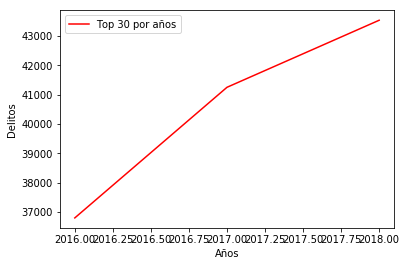

In [56]:
x_axis = np.arange(2016,2019,1)
points = [36803, 41252, 43536]
Delitos_año = plt.plot(x_axis,points, color = "red", label = "Top 30 por años")

plt.xlabel("Años")
plt.ylabel("Delitos")
plt.legend(loc="higher right")
plt.show()
     

año_hechos
delito                                         alcaldia_hechos                
VIOLENCIA FAMILIAR                             VENUSTIANO CARRANZA         567
                                               TLALPAN                     578
                                               IZTAPALAPA                 1721
ROBO A NEGOCIO SIN VIOLENCIA                   IZTAPALAPA                 1003
AMENAZAS                                       IZTAPALAPA                  797
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA IZTAPALAPA                 1261
VIOLENCIA FAMILIAR                             IZTACALCO                   566
ROBO A NEGOCIO SIN VIOLENCIA                   CUAUHTEMOC                 1137
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA CUAUHTEMOC                 1032
ROBO DE OBJETOS                                CUAUHTEMOC                  993
FRAUDE                                         CUAUHTEMOC                  831
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA CUAUHTEMOC                  565
VIOLENCIA FAMILIAR                             CUAUHTEMOC                  770
AMENAZAS                                       CUAUHTEMOC                  712
ROBO DE ACCESORIOS DE AUTO                     CUAUHTEMOC                  648
VIOLENCIA FAMILIAR                             COYOACAN                    610
ROBO A NEGOCIO SIN VIOLENCIA                   BENITO JUAREZ               741
ROBO DE ACCESORIOS DE AUTO                     BENITO JUAREZ               712
FRAUDE                                         BENITO JUAREZ               543
VIOLENCIA FAMILIAR                             ALVARO OBREGON              807

In [82]:
PGJ_top_2016=PGJ_2016.groupby("alcaldia_hechos").count()
#PGJ_Top_2016=PGJ_Top_2016.loc[:,["alcaldia_hechos","delito"]]
#PGJ_Top_2016=(PGJ_Top_2016.sort_values(by ="alcaldia_hechos",ascending=False)).head(20)
PGJ_top_2016

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
alcaldia_hechos,,,,,,,,,,,,,,,,,
ALVARO OBREGON,12282,12282,12282,12282,12282,12282,12282,12279,12043,12282,12282,12282,12241,4028,12047,12047,12047
AZCAPOTZALCO,10021,10021,10021,10021,10021,10021,10021,10019,9926,10021,10021,10021,10000,4335,9928,9928,9928
BENITO JUAREZ,16419,16419,16419,16419,16419,16419,16419,16419,16098,16419,16419,16419,16392,7291,16105,16105,16105
COYOACAN,13548,13548,13548,13548,13548,13548,13548,13548,13228,13548,13548,13548,13519,6061,13231,13231,13231
CUAJIMALPA DE MORELOS,2798,2798,2798,2798,2798,2798,2798,2798,2769,2798,2798,2798,2795,1037,2770,2770,2770
CUAUHTEMOC,31444,31444,31444,31444,31444,31444,31444,31436,29916,31444,31444,31444,31334,14262,29930,29930,29930
IZTACALCO,8049,8049,8049,8049,8049,8049,8049,8010,7941,8049,8049,8049,8034,4498,7947,7947,7947
IZTAPALAPA,29183,29183,29183,29183,29183,29183,29183,29096,28430,29183,29183,29183,29094,13291,28443,28443,28443
LA MAGDALENA CONTRERAS,3044,3044,3044,3044,3044,3044,3044,3042,3007,3044,3044,3044,3039,950,3007,3007,3007


In [67]:
x_axis = np.arange(2016,2019,1)
delitos_ALVARO_OBREGON = [1,11572,16386]
delitos_AZCAPOTZALCO = [1,2,12026]
delitos_BENITO_JUAREZ  = [1,2,16386]
delitos_COYOACAN = [1,2,16386]
delitos_CUAJIMALPA_DE_MORELOS = [1,2,16386]
delitos_CUAUHTEMOC = [1,2,16386]
delitos_IZTACALCO  = [1,2,16386]
delitos_IZTAPALAPA  = [1,2,16386]
delitos_LA_MAGDALENA_CONTRERAS = [1,2,16386]
delitos_MIGUEL HIDALGO   = [1,2,16386]
delitos_MILPA ALTA   = [1,2,16386]
delitos_TLAHUAC  = [1,2,16386]
delitos_TLALPAN = [1,2,16386]
delitos_VENUSTIANO_CARRANZA = [1,2,16386]
delitos_XOCHIMILCO = [1,2,16386]

    
danger_h = plt.plot(x_axis,danger_drop, color = "red", label = "Danger Drop")
rail_h = plt.plot(x_axis,rail_gun, color = "green", label = "RailGun")
plt.xlabel("Coaster Runtime")
plt.ylabel("Speed (MPH)")
plt.legend(loc="higher right")
plt.ylim(0,100)
plt.title("Coaster Speed Over Time")
plt.grid()

plt.show()


SyntaxError: invalid syntax (<ipython-input-67-9c9320da3b88>, line 7)

In [68]:
PGJ_Delitos=PGJ_base.groupby(["año_hechos","alcaldia_hechos"]).count()
PGJ_Delitos=PGJ_Delitos["delito"]
PGJ_Delitos.head(45)

año_hechos  alcaldia_hechos       
2016.0      ALVARO OBREGON            12282
            AZCAPOTZALCO              10021
            BENITO JUAREZ             16419
            COYOACAN                  13548
            CUAJIMALPA DE MORELOS      2798
            CUAUHTEMOC                31444
            IZTACALCO                  8049
            IZTAPALAPA                29183
            LA MAGDALENA CONTRERAS     3044
            MIGUEL HIDALGO            12549
            MILPA ALTA                 1125
            TLAHUAC                    4148
            TLALPAN                   11573
            VENUSTIANO CARRANZA       10828
            XOCHIMILCO                 6175
2017.0      ALVARO OBREGON            14263
            AZCAPOTZALCO              11237
            BENITO JUAREZ             19980
            COYOACAN                  15179
            CUAJIMALPA DE MORELOS      3044
            CUAUHTEMOC                36271
            IZTACALCO                  96

array([2016, 2017, 2018])